In [33]:
import pandas as pd

import statsmodels.api as sm

# falls der Cache mal wieder invalid ist einmal folgende
# 3 Zeilen einkommentieren
import importlib
import classes.Util
importlib.reload(classes.Util)
from classes.Util import Util

In [34]:
carbonEmissionRaw = pd.read_csv('./data/raw/ourworldindata/co-emissions-per-capita.csv')
gdpRaw = pd.read_csv('./data/raw/eurostat/estat_tipsna40_filtered_de.csv')
countryCodes = pd.read_csv('./data/raw/country_codes_all.csv')

In [35]:
def readEurostatData(rawData, valueName):
    return rawData[['geo', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'geo': 'country_raw', 'TIME_PERIOD' : 'year', 'OBS_VALUE': valueName})

 # Utility Funktionen zum einfachheren weiterverarbeiten
def readWorldBankData(rawData, valueName):
    return rawData[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'REF_AREA': 'country_id', 'TIME_PERIOD' : 'year', 'OBS_VALUE': valueName})

countryCodes.loc[len(countryCodes)] = ['LUX', 'Luxembourg', 'Luxemburg']

# Carbon Emission
carbonEmissionExtracted = (
    carbonEmissionRaw
        .rename(columns={'Code': 'country_id', 'Year': 'year', 'Annual CO₂ emissions (per capita)': 'carbonEmission' })
        .drop(columns=['Entity'])
)

# Bip
gdpExtracted = (
    pd.merge(readEurostatData(gdpRaw, 'gdp'), countryCodes, left_on=['country_raw'], right_on=['Name (German)'])
        .rename(columns={ 'Code': 'country_id' })
        .drop(columns=['Name (German)', 'Name (English)', 'country_raw'])
)

# Bip

# Kombiniere die Frames zu einem Großen
combinedFrame = pd.merge(gdpExtracted, carbonEmissionExtracted, on=['country_id', 'year'], how="inner")

In [36]:
# Stationaritätsprüfung

# Finnland 
(Util(combinedFrame, 'FIN')
 # stationarität
 .adfullerTest('gdp', regression='ct')
 .adfullerTest('carbonEmission', regression='ct')
)

# Österreich
(Util(combinedFrame, 'AUT')
 # stationarität
 .adfullerTest('gdp', regression='ct')
 .adfullerTest('carbonEmission', regression='ct')
)

# Ungarn
(Util(combinedFrame, 'HUN')
 # stationarität
 .adfullerTest('gdp', regression='ct')
 .adfullerTest('carbonEmission', regression='ct')
)

Util open on FIN:
ADF gdp 0 hypothese verwerfen: False, p-wert: 0.41613595814389576
ADF carbonEmission 0 hypothese verwerfen: False, p-wert: 0.8528927737023413
Util open on AUT:
ADF gdp 0 hypothese verwerfen: False, p-wert: 0.36419046613197964
ADF carbonEmission 0 hypothese verwerfen: False, p-wert: 0.6389686262765616
Util open on HUN:
ADF gdp 0 hypothese verwerfen: False, p-wert: 0.8204367206983999
ADF carbonEmission 0 hypothese verwerfen: True, p-wert: 0.0006189956492935852


Util open on FIN:
                            OLS Regression Results                            
Dep. Variable:         carbonEmission   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     6.986
Date:                Tue, 15 Jul 2025   Prob (F-statistic):            0.00373
Time:                        22:02:49   Log-Likelihood:                -58.341
No. Observations:                  29   AIC:                             122.7
Df Residuals:                      26   BIC:                             126.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -24.5858    

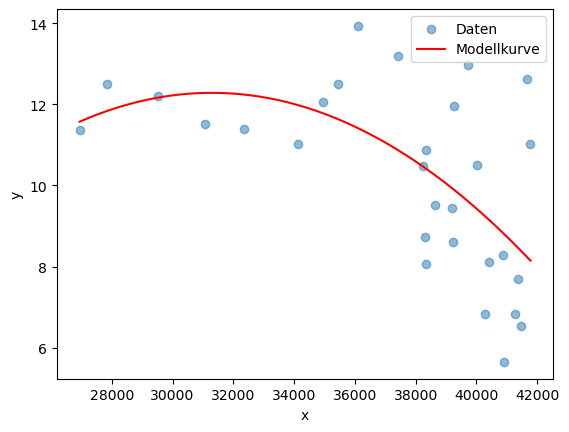

Util open on AUT:
                            OLS Regression Results                            
Dep. Variable:         carbonEmission   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     17.01
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           1.89e-05
Time:                        22:02:49   Log-Likelihood:                -22.216
No. Observations:                  29   AIC:                             50.43
Df Residuals:                      26   BIC:                             54.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -41.8473    

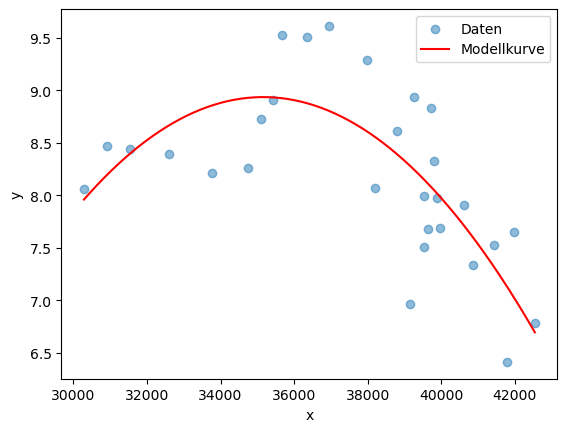

In [37]:
# Regressionsmodell für CPR

(Util(combinedFrame, 'FIN')
    .useGdpSquared()
    .ols()
    .olsSummery()
    .adfullerTest(regression='n')
    .getTurningPoint()
    .olsPlot()
)

(Util(combinedFrame, 'AUT')
    .useGdpSquared()
    .ols()
    .olsSummery()
    .adfullerTest(regression='n')
    .getTurningPoint()
    .olsPlot()
)

# (Util(combinedFrame, 'HUN')
#     .useGdpSquared()
#     .useGdpSquared()
#     .ols()
#     .olsSummery()
#     .getTurningPoint()
#     .olsPlot()
# )

Util open on FIN:
                     gdp  carbonEmission
gdp             1.000000       -0.519124
carbonEmission -0.519124        1.000000
differenziere gdp
differenziere carbonEmission
ADF gdp 0 hypothese verwerfen: True, p-wert: 0.0014055382175958888
ADF carbonEmission 0 hypothese verwerfen: False, p-wert: 0.17491124666738356


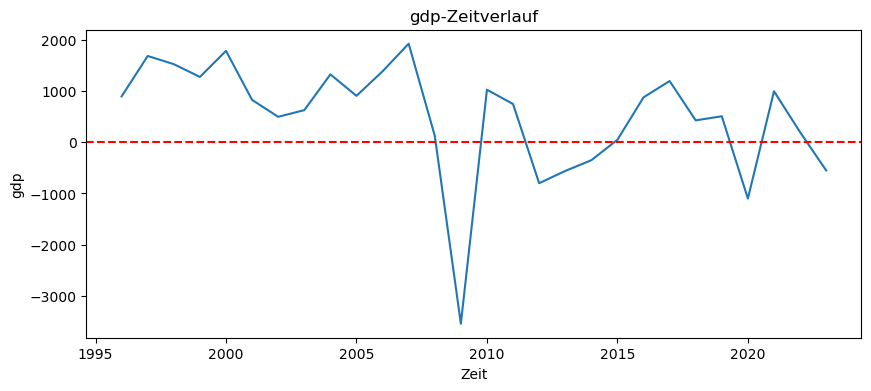

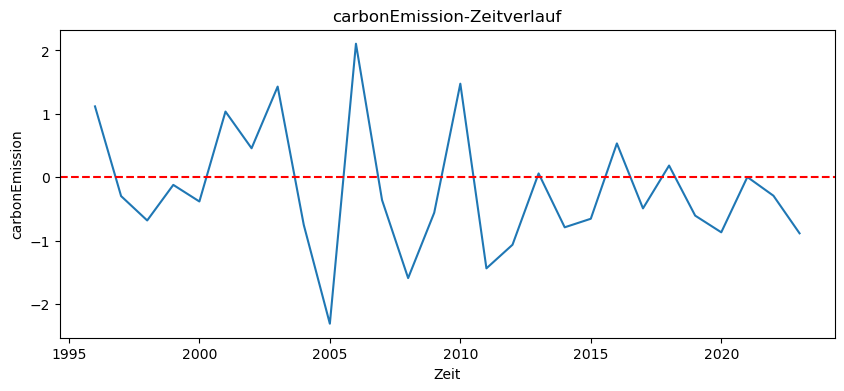

                            OLS Regression Results                            
Dep. Variable:         carbonEmission   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.469
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.236
Time:                        22:05:03   Log-Likelihood:                -38.136
No. Observations:                  28   AIC:                             80.27
Df Residuals:                      26   BIC:                             82.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3065      0.203     -1.507      0.1

c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Bestes Modell: ARMA(2, 0) mit AIC = 74.55
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -33.275
Date:                Tue, 15 Jul 2025   AIC                             74.550
Time:                        22:05:05   BIC                             79.879
Sample:                             0   HQIC                            76.180
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0098      0.101     -0.097      0.923      -0.208       0.188
ar.L1         -0.3499      0.182     -1.917      0.055      -0.708       0.008
ar.L2     

c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
# Aufbau Modellierung Regression Models with Time Series Errors
(Util(combinedFrame, 'FIN')
  .correlationsTest()
  .differenciate(['gdp', 'carbonEmission'])
  .adfullerTest('gdp')
  .adfullerTest('carbonEmission')
  .timePlot('gdp')
  .timePlot('carbonEmission')
  .ols()
  .olsSummery()
  .adfullerTest(regression='n')
  .armaGridSearch()
)

Util open on AUT:
                    gdp  carbonEmission
gdp             1.00000        -0.47857
carbonEmission -0.47857         1.00000
differenziere gdp
differenziere carbonEmission
ADF gdp 0 hypothese verwerfen: True, p-wert: 1.8842630319291091e-06
ADF carbonEmission 0 hypothese verwerfen: True, p-wert: 3.657055583926539e-08


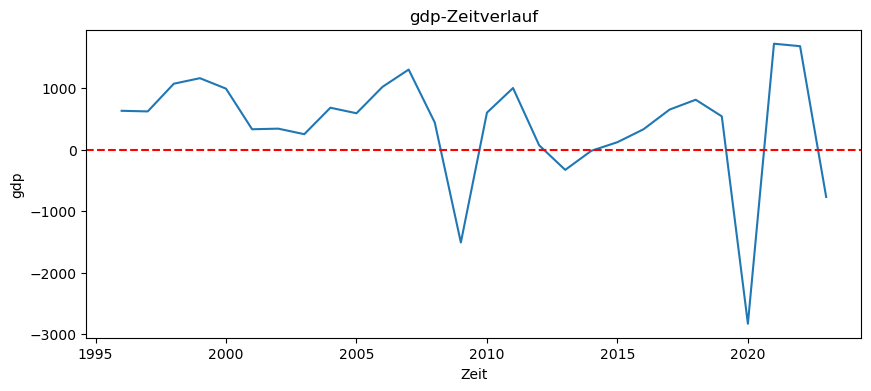

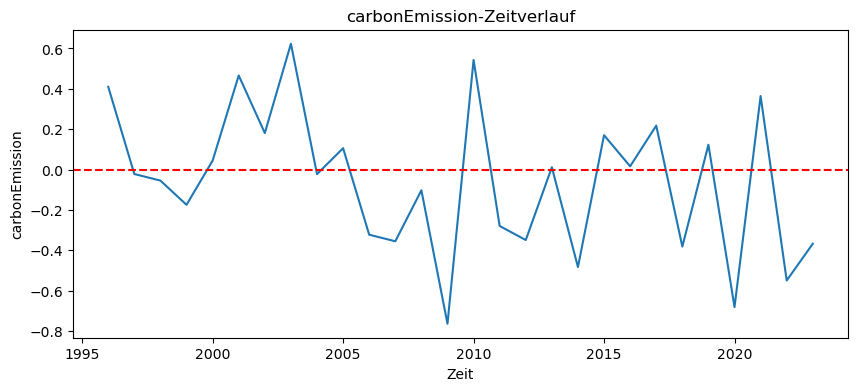

                            OLS Regression Results                            
Dep. Variable:         carbonEmission   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     3.917
Date:                Tue, 15 Jul 2025   Prob (F-statistic):             0.0585
Time:                        22:16:13   Log-Likelihood:                -8.9809
No. Observations:                  28   AIC:                             21.96
Df Residuals:                      26   BIC:                             24.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1169      0.072     -1.630      0.1

c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Bestes Modell: ARMA(0, 0) mit AIC = 21.96
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:                          ARIMA   Log Likelihood                  -8.981
Date:                Tue, 15 Jul 2025   AIC                             21.962
Time:                        22:16:15   BIC                             24.626
Sample:                             0   HQIC                            22.776
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.921e-06      0.064  -7.72e-05      1.000      -0.125       0.125
sigma2         0.1112      0.036      3.099      0.002       0.041       0.182
Ljung-Box 

c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

In [50]:
# Aufbau Modellierung Regression Models with Time Series Errors
(Util(combinedFrame, 'AUT')
  .correlationsTest()
  .differenciate(['gdp', 'carbonEmission'])
  .adfullerTest('gdp')
  .adfullerTest('carbonEmission')
  .timePlot('gdp')
  .timePlot('carbonEmission')
  .ols()
  .olsSummery()
  .adfullerTest(regression='n')
  .armaGridSearch()
)

Util open on HUN:
                     gdp  carbonEmission
gdp             1.000000       -0.754528
carbonEmission -0.754528        1.000000
differenziere gdp
differenziere carbonEmission
ADF gdp 0 hypothese verwerfen: True, p-wert: 2.1840345519536486e-05
ADF carbonEmission 0 hypothese verwerfen: True, p-wert: 0.0029822662957918918


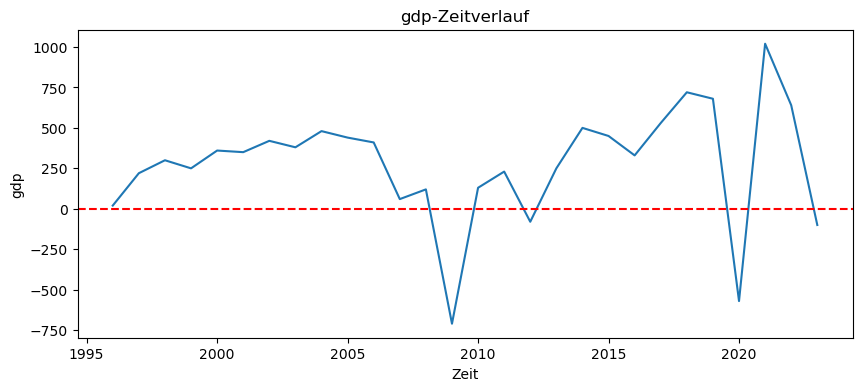

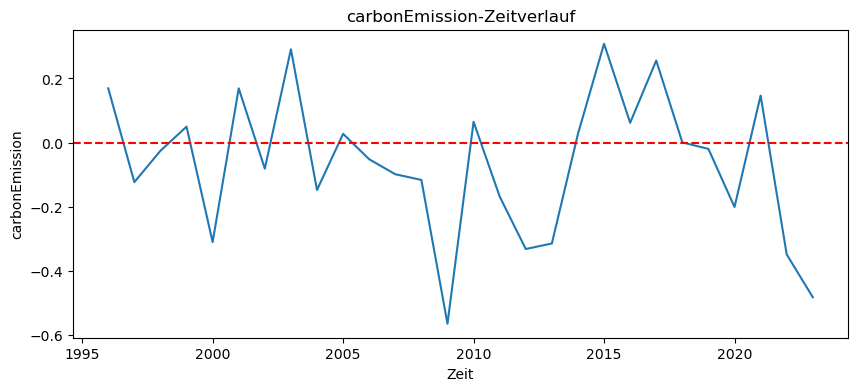

                            OLS Regression Results                            
Dep. Variable:         carbonEmission   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     9.631
Date:                Tue, 15 Jul 2025   Prob (F-statistic):            0.00457
Time:                        22:24:12   Log-Likelihood:                 7.3100
No. Observations:                  28   AIC:                            -10.62
Df Residuals:                      26   BIC:                            -7.956
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1549      0.047     -3.314      0.0

c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

Bestes Modell: ARMA(0, 0) mit AIC = -10.62
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:                          ARIMA   Log Likelihood                   7.310
Date:                Tue, 15 Jul 2025   AIC                            -10.620
Time:                        22:24:15   BIC                             -7.956
Sample:                             0   HQIC                            -9.806
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.947e-06      0.035     -0.000      1.000      -0.069       0.069
sigma2         0.0347      0.011      3.168      0.002       0.013       0.056
Ljung-Box

c:\Users\eyesa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
# Aufbau Modellierung Regression Models with Time Series Errors
(Util(combinedFrame, 'HUN')
  .correlationsTest()
  .differenciate(['gdp', 'carbonEmission'])
  .adfullerTest('gdp')
  .adfullerTest('carbonEmission')
  .timePlot('gdp')
  .timePlot('carbonEmission')
  .ols()
  .olsSummery()
  .adfullerTest(regression='n')
  .armaGridSearch()
)